# Background

This notebooks has three bugs, related to:
1. geocoding
2. CRS projections (Coordinate Reference Systems)
3. overlays

Reference: https://tyler.caraza-harter.com/cs320/s21/lec/25-viz2/reading.html

## Goal

Say you want to advertise to nearby residents for this grocery store: https://freshmadisonmarket.com/.  You want to create a map like this to identify these potential customers:

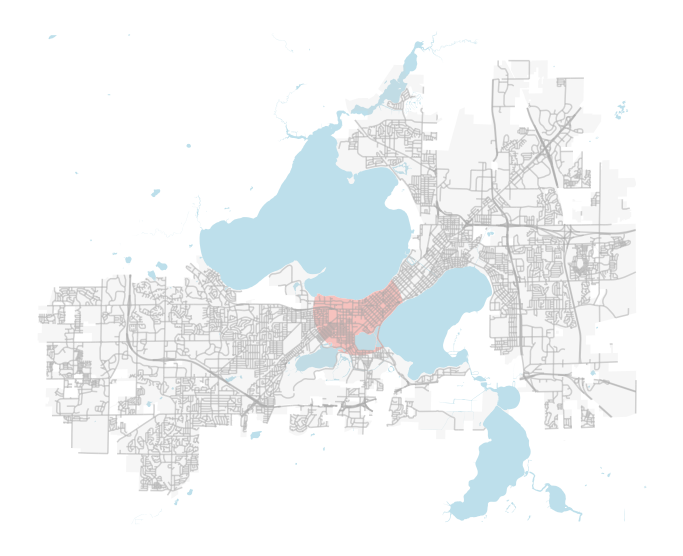

In [1]:
from IPython.display import Image
Image(filename='expected.png') 

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
plt.rcParams["font.size"] = 16

In [3]:
%matplotlib inline

In [4]:
city = gpd.read_file("zip://city.zip")
lakes = gpd.read_file("zip://lakes.zip")
street = gpd.read_file("zip://street.zip")

In [5]:
# BUG 1: why isn't it finding the one on the corner of University and N Lake Street?
fresh = gpd.tools.geocode("The Fresh Market", provider="nominatim", user_agent="cs320-d8")
fresh

geometry                                          address
0  POINT (121.45783 31.20725)  Fresh Market, 陕西南路, 打浦桥, 打浦桥街道, 黄浦区, 200032, 中国

In [6]:
def plot_background():
    ax = city.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=2)
    lakes.plot(color="lightblue", ax=ax, zorder=1, alpha=0.8)
    street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
    ax.set_axis_off()
    return ax

In [7]:
# BUG 2: why is it complaining we didn't do to_crs, when we did?
fresh.to_crs("epsg:32616") # reproject to meters
fresh.geometry = fresh.geometry.buffer(2000)
fresh.to_crs(city.crs) # reproject back to lat, lon for plotting

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


geometry  \
0  POLYGON ((2121.458 31.207, 2111.827 -164.827, ...   

                                           address  
0  Fresh Market, 陕西南路, 打浦桥, 打浦桥街道, 黄浦区, 200032, 中国

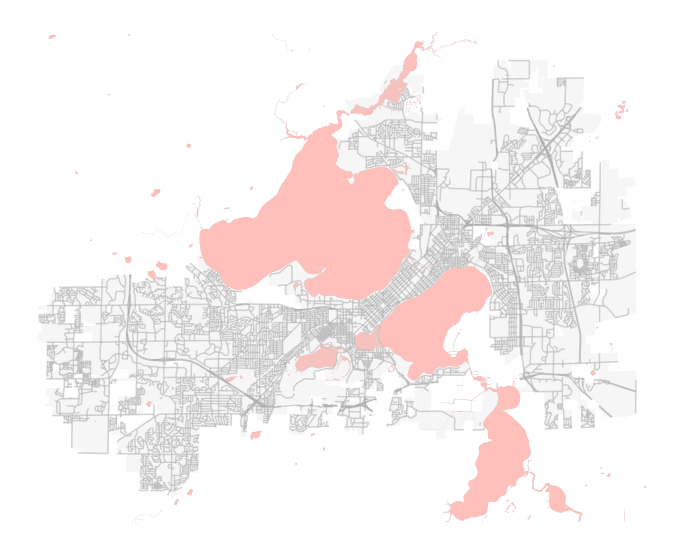

In [8]:
# BUG 3: why it it showing nearby water instead of nearby land?
# HINT: there are three main overlay types: union, intersection, and difference
ax = plot_background()
nearby_land = gpd.overlay(fresh, lakes, how='intersection')
nearby_land.plot(color="#ffbfba", ax=ax)